# 비정상 절차서 23-03 :  <font color=blue> 1차기기 냉각수(CCW)계통으로 누설 시	

1. 경보 및 증상
2. 자동 동작사항
3. 긴급 조치사항
4. 후속 조치사항

## 1.0  <font color=blue> 데이터 처리

In [1]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
# with open('D:/CRONI_New_Interface/new_db_30mal/ab23_06_30004_(175).pkl', 'rb') as f:
with open('D:/이상현/9._.CNS_Platform(멀티 CNS 실행)/상현CNN/Data_pkl/ab23_03_74.pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 'CPPRZL':deque(maxlen=5), 'PPRZ':deque(maxlen=5)}

## 2.0  <font color=blue> 경보 및 증상 

### 2.1  <font color=blue>모든 원자로냉각재계통 누설 시 공통적 증상

#### 2.1.1 <font color=blue>PZR 수위 또는 압력 감소 - <font color=red>불만족

#### 주의사항

PZR 증기영역 및 계기 접속부에서의 누설 시에는 수위 감소현상은 발생하지 않을 수도 있다. 

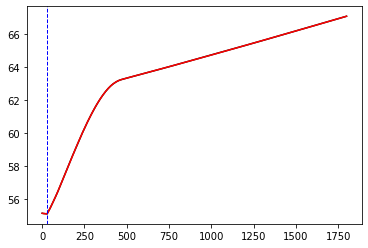

In [2]:
# ZINST63 : 가압기 수위
plt.plot(db['ZINST63'], color='k') # -> 수위 감소 확인
plt.plot(db['ZPRZ']*10, color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

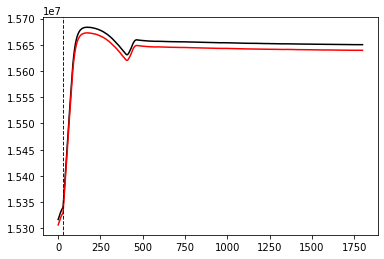

In [3]:
# ZINST58 : 가압기 압력
plt.plot(db['ZINST58']*98067, color='k') # -> 압력 감소 확인
plt.plot(db['PPRZ'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [4]:
pzr_level, pzr_pres = [], []
for i in range(len(db)):
    if i > 29:
        sym_ch[0].append(db['ZINST63'][i])
        sym_ch[1].append(db['ZINST58'][i])
    if len(sym_ch[0]) == 5:
        if sym_ch[0][0] > sym_ch[0][1] > sym_ch[0][2] > sym_ch[0][3] > sym_ch[0][4]:
            pzr_level.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
    if len(sym_ch[1]) == 5:
        if sym_ch[1][0] > sym_ch[1][1] > sym_ch[1][2] > sym_ch[1][3] > sym_ch[1][4]:
            pzr_pres.append(i+1)
#             print(f'압력 감소 증상 만족 시간 : {i+1}초')


if len(pzr_level) != 0:
    print(f'최초 수위 감소 증상 만족 시간 : {pzr_level[0]}초')
    print(f'최초 압력 감소 증상 만족 시간 : {pzr_pres[0]}초'):

else:
    print('증상을 만족하지 못했습니다.')

IndexError: list index out of range

#### 2.1.2 <font color=blue> VCT 수위 감소 또는 보충횟수 증가 - <font color=red>불만족

<font color = red>Report<br>

VCT를 통한 보충수 유입 횟수의 산정이 어렵기 때문에 "VCT 수위 감소"만을 확인

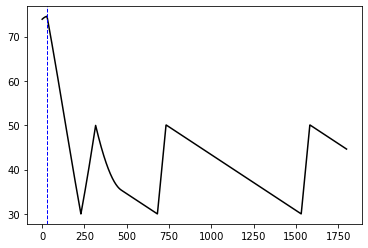

In [5]:
# ZVCT : VCT 수위
plt.plot(db['ZVCT'], color='k') # -> 수위 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [6]:
vct_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[2].append(db['ZVCT'][i])
    if len(sym_ch[2]) == 5:
        if sym_ch[2][0] > sym_ch[2][1] > sym_ch[2][2] > sym_ch[2][3] > sym_ch[2][4]:
            vct_level.append(i+1)
print(f'최초 VCT 수위 감소 증상 만족 시간 : {vct_level[0]}초')

최초 VCT 수위 감소 증상 만족 시간 : 35초


#### 2.1.3  <font color=blue>발전소 제반요소의 변동이 없는 상태에서 충전유량의 증가 - <font color=green>만족


#### 참고사항


 위 사항은 모든 원자로냉각재계통 누설 시의 증상에 공통적으로 적용된다.

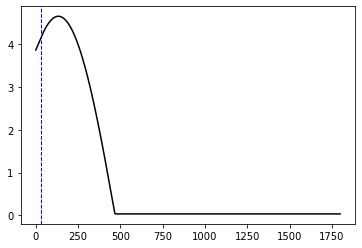

In [7]:
# WCHGNO : 충전유량
plt.plot(db['WCHGNO'], color='k') # -> 충전유량 증가 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [8]:
ch_flow = []
num = 3 # 증감을 판단하는 부분이 아니라면 필요없는 부분임.
for i in range(len(db)):
    if i > 29:
        sym_ch[num].append(db['WCHGNO'][i])
        if len(sym_ch[num]) == 5:
            if sym_ch[num][0] < sym_ch[num][1] < sym_ch[num][2] < sym_ch[num][3] < sym_ch[num][4]:
                ch_flow.append(i+1)
print(f'최초 충전유량 증가 증상 만족 시간 : {ch_flow[0]}초')

최초 충전유량 증가 증상 만족 시간 : 35초


### 2.2  <font color=blue>CCW Hx 출구헤더에 설치된 방사선감시기(EG-RE364)의 지시치 증가 및 경보  - <font color=red>불만족
    
#### "NON-1E RAD WARN(UA-901-C2)" 또는
#### "NON-1E RAD HIGH ALARM(UA-901-C2)"

<font color=red> REPORT<BR>
    CCW Hx 출구헤더에 설치된 방사선 감시기 변수를 찾을 수 없음.

### 2.3  <font color=blue>CCW 완충탱크의 수위 증가  - <font color=red>불만족

<font color=red> REPORT<BR>
    CCW 완충탱크의 수위 증가 변수를 찾을 수 없음.

### 2.4  <font color=blue>RCP 열방벽(Thermal Barrier) 열교환기 누설 시 RCP 열방벽 열교환기(RCP T/B Hx) 출구온도(전산값) 증가 및 CCW 유량 증가 경보 발생   - <font color=red>불만족
    
#### “RCP A THER BARR CLG COIL FLOW HI/LO(UA-907-A1)"  또는
#### “RCP B THER BARR CLG COIL FLOW HI/LO(UA-907-A2)"  또는
#### “RCP C THER BARR CLG COIL FLOW HI/LO(UA-907-A3)" 

<font color=red> REPORT<BR>
    변수를 찾을 수 없음.

## 3.0  <font color=blue> 자동 동작사항

### 3.1  <font color=blue>RCP 열방벽 열교환기 출구 ‘고’ 유량(EG-FI435, 433, 431 : 3.78 ℓ/s) 시 해당 RCP 열방벽 열교환기 출구밸브 자동 닫힘  - <font color=red>불만족

<font color=red> REPORT<BR>
   변수를 찾을 수 없음.

### 3.2  <font color=blue>RCP 열방벽 열교환기 출구 밸브(EG-FV435, 433, 431) 닫힘으로 인해 RCP  열방벽 열교환기 압력보호밸브(EG-PSV434, 432, 430) 동작으로 격납용기 배수조 수위 증가  - <font color=red>불만족
    
#### ※ EG-PSV434, 432, 430 개방 설정치 : 2500 psig (175.76 kg/㎠)

<font color=red> REPORT<BR>
    변수를 찾을 수 없음.

### 3.3  <font color=blue>RCP 열방벽 열교환기 누설로 인하여 1차기기 냉각수(CCW) 공통회수관의 유량전송기(EG-FT337) '고‘ 유량(13.5 ℓ/s) 시 격납용기 내부 CCW 차단밸브(EG-HV337)  자동 닫힘  - <font color=red>불만족

<font color=red> REPORT<BR>
   변수를 찾을 수 없음.

### 3.4  <font color=blue>가압기 수위가 17％ 이하로 감소할 경우 유출수 밸브가(BG-HV001/002/003, BG-LV459/460 ) 자동으로 차단된다.  - <font color=red>불만족

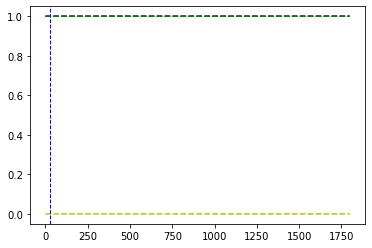

In [23]:
# ZINST63 : 가압기 수위, BHV1 : HV1 (45), BHV2 : HV2 (60), BHV3 : HV3 (75)
# BLV459 : 유출수 격리밸브
plt.plot(db['BHV1'], color='r', linestyle='--')
plt.plot(db['BHV2'], color='b', linestyle='--')
plt.plot(db['BHV3'], color='y', linestyle='--')
plt.plot(db['BLV459'], color='g', linestyle='--')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [10]:
auto1 = []
for i in range(len(db)):
    if i > 29:
        if (db['ZINST63'][i] < 17) and (db['BHV1'][i] == 0) and (db['BHV2'][i] == 0) and (db['BHV3'][i] == 0) and (db['BLV459'][i] == 0):
            auto1.append(i+1)
if len(auto1) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 유출수밸브 차단 증상 만족 시간 : {auto1[0]}초')

증상을 만족하지 못했습니다.


### 3.5  <font color=blue>RCS 압력이 136.78㎏/㎠ 이하가 되면 원자로 트립(Rx Trip)이 발생한다.  - <font color=red>불만족

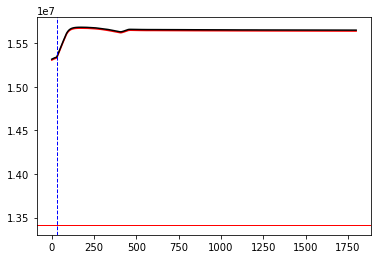

In [11]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(136.8*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [12]:
PRZ_low_trip = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 136.8*98067 and db['KRXTRIP'][i] == 1 :
            PRZ_low_trip.append(i+1)
if len(PRZ_low_trip) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f' Rx trip 만족 시간 : {PRZ_low_trip[0]}초')

증상을 만족하지 못했습니다.


### 3.6  <font color=blue>RCS 압력이 126.57㎏/㎠ 이하가 되면 안전주입(SI)이 발생한다.  - <font color=red>불만족

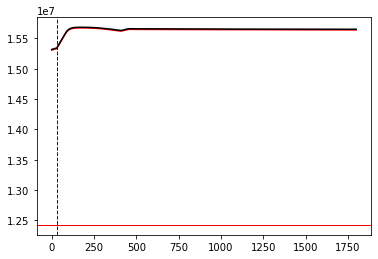

In [13]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(126.7*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [14]:
PRZ_low_SI = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 126.7*98067 and db['KSAFEI'][i] == 1 :
            PRZ_low_SI.append(i+1)
if len(PRZ_low_SI) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'SI 작동 만족 시간 : {PRZ_low_SI[0]}초')

증상을 만족하지 못했습니다.
